In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [13]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\customers_dataset_large.csv")
df.head()

,CustomerID,Gender,Age,AnnualIncome,PurchaseFrequency,AvgOrderValue,SpendingScore,RecencyDays,TenureMonths,LoyaltyPoints
0,1,Male,34,130177,17,4419,72,328,42,3337
1,2,Female,26,37674,3,4030,7,219,53,4236
2,3,Male,50,103560,2,1054,78,109,96,4624
3,4,Male,37,131543,23,839,56,279,59,443
4,5,Male,30,43874,20,2438,67,174,74,4561


In [14]:
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Age                1000 non-null   int64 
 3   AnnualIncome       1000 non-null   int64 
 4   PurchaseFrequency  1000 non-null   int64 
 5   AvgOrderValue      1000 non-null   int64 
 6   SpendingScore      1000 non-null   int64 
 7   RecencyDays        1000 non-null   int64 
 8   TenureMonths       1000 non-null   int64 
 9   LoyaltyPoints      1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB
None
CustomerID           0
Gender               0
Age                  0
AnnualIncome         0
PurchaseFrequency    0
AvgOrderValue        0
SpendingScore        0
RecencyDays          0
TenureMonths         0
LoyaltyPoints        0
dtype: int64


,CustomerID,Age,AnnualIncome,PurchaseFrequency,AvgOrderValue,SpendingScore,RecencyDays,TenureMonths,LoyaltyPoints
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.799000,87072.859000,15.162000,2685.223000,50.567000,185.628000,61.509000,2553.649000
std,288.819436,15.133857,38266.311766,8.396443,1352.758842,28.022469,103.124674,34.143106,1421.409768
min,1.000000,18.000000,20281.000000,1.000000,206.000000,1.000000,1.000000,1.000000,104.000000
25%,250.750000,31.000000,52723.250000,8.000000,1573.500000,27.000000,99.000000,31.000000,1241.000000
50%,500.500000,44.000000,88482.000000,16.000000,2691.500000,51.000000,188.000000,62.000000,2668.000000
75%,750.250000,57.000000,121396.750000,22.000000,3864.750000,75.000000,273.000000,90.000000,3759.500000
max,1000.000000,69.000000,149839.000000,29.000000,4999.000000,99.000000,364.000000,119.000000,4999.000000


In [15]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  
df = df.drop(columns=["CustomerID"])
df.head()

,Gender,Age,AnnualIncome,PurchaseFrequency,AvgOrderValue,SpendingScore,RecencyDays,TenureMonths,LoyaltyPoints
0,1,34,130177,17,4419,72,328,42,3337
1,0,26,37674,3,4030,7,219,53,4236
2,1,50,103560,2,1054,78,109,96,4624
3,1,37,131543,23,839,56,279,59,443
4,1,30,43874,20,2438,67,174,74,4561


In [16]:
X = df.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
print("Data shape after scaling:", scaled_features.shape)

Data shape after scaling: (1000, 9)


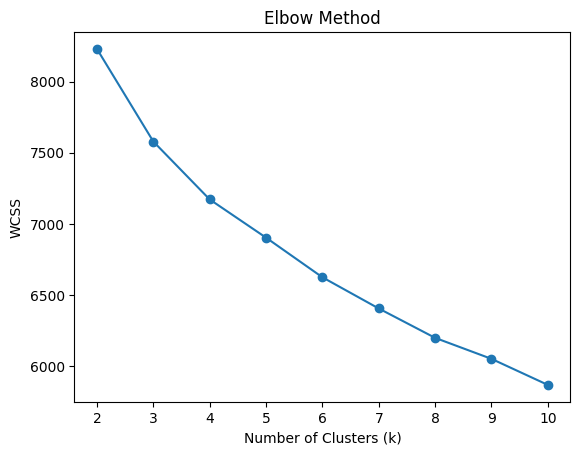

For k = 2, silhouette score = 0.084
For k = 3, silhouette score = 0.095
For k = 4, silhouette score = 0.095
For k = 5, silhouette score = 0.089
For k = 6, silhouette score = 0.090
For k = 7, silhouette score = 0.089
For k = 8, silhouette score = 0.092
For k = 9, silhouette score = 0.089
For k = 10, silhouette score = 0.092


In [17]:
wcss = []  
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"For k = {k}, silhouette score = {score:.3f}")

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster'].value_counts()

Cluster
0    509
1    491
Name: count, dtype: int64

           Gender        Age  AnnualIncome  PurchaseFrequency  AvgOrderValue  \
Cluster                                                                        
0        0.497053  41.123772  85632.489194          15.917485    3775.577603   
1        0.482688  46.572301  88566.032587          14.378819    1554.896130   

         SpendingScore  RecencyDays  TenureMonths  LoyaltyPoints  
Cluster                                                           
0            50.296660   172.304519     66.392927    2384.094303  
1            50.847251   199.439919     56.446029    2729.419552  


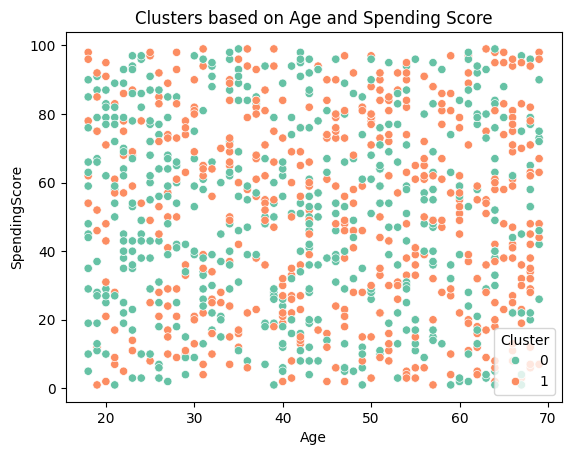

In [19]:
cluster_profile = df.groupby("Cluster").mean()
print(cluster_profile)
sns.scatterplot(x=df['Age'], y=df['SpendingScore'], hue=df['Cluster'], palette="Set2")
plt.title("Clusters based on Age and Spending Score")
plt.show()

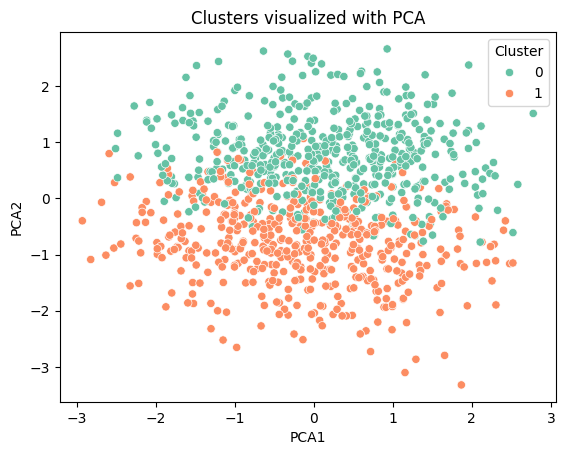

In [20]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df["PCA1"] = pca_features[:, 0]
df["PCA2"] = pca_features[:, 1]

sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2")
plt.title("Clusters visualized with PCA")
plt.show()


In [21]:
print("Cluster 0: Might represent younger customers with higher spending.")
print("Cluster 1: Might represent older, budget-conscious customers.")


Cluster 0: Might represent younger customers with higher spending.
Cluster 1: Might represent older, budget-conscious customers.


In [22]:
cluster_profile = df.groupby("Cluster").mean()
cluster_counts = df['Cluster'].value_counts()
print("Cluster Profile (mean values):\n", cluster_profile)
print("\nCluster Counts:\n", cluster_counts)


Cluster Profile (mean values):
            Gender        Age  AnnualIncome  PurchaseFrequency  AvgOrderValue  \
Cluster                                                                        
0        0.497053  41.123772  85632.489194          15.917485    3775.577603   
1        0.482688  46.572301  88566.032587          14.378819    1554.896130   

         SpendingScore  RecencyDays  TenureMonths  LoyaltyPoints      PCA1  \
Cluster                                                                      
0            50.296660   172.304519     66.392927    2384.094303  0.132551   
1            50.847251   199.439919     56.446029    2729.419552 -0.137410   

             PCA2  
Cluster            
0        0.772421  
1       -0.800738  

Cluster Counts:
 Cluster
0    509
1    491
Name: count, dtype: int64


In [23]:
recommendations = {
    0: "Target younger, high-spending customers with premium products and loyalty programs.",
    1: "Target older, budget-conscious customers with discounts, bundle offers, and value deals."
}


df['Marketing_Recommendation'] = df['Cluster'].map(recommendations)


df[['Cluster', 'Marketing_Recommendation']].head()


,Cluster,Marketing_Recommendation
0,0,"Target younger, high-spending customers with p..."
1,0,"Target younger, high-spending customers with p..."
2,1,"Target older, budget-conscious customers with ..."
3,1,"Target older, budget-conscious customers with ..."
4,0,"Target younger, high-spending customers with p..."


In [24]:
with pd.ExcelWriter(r"C:\Users\Hp\Downloads\Customer_Segmentation_Report.xlsx") as writer:
    
    cluster_profile.to_excel(writer, sheet_name="Cluster_Profile")
    
    
    cluster_counts.to_frame(name='Customer_Count').to_excel(writer, sheet_name="Cluster_Counts")
    
    
    df[['Cluster', 'Marketing_Recommendation']].drop_duplicates().to_excel(writer, sheet_name="Recommendations")
    
print("Customer segmentation report exported successfully!")


Customer segmentation report exported successfully!


In [25]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['SpendingScore'], hue=df['Cluster'], palette="Set2")
plt.title("Clusters based on Age and Spending Score")
plt.savefig(r"C:\Users\Hp\Downloads\Clusters_Age_SpendingScore.png")
plt.close()

# PCA plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2")
plt.title("Clusters visualized with PCA")
plt.savefig(r"C:\Users\Hp\Downloads\Clusters_PCA.png")
plt.close()
